<a href="https://colab.research.google.com/github/maheshs11/computer-vision-based-security-system/blob/main/mahesh_D2GO_int8_export_mask_rcnn_fbnetv3a_c4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# D2Go 

## drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive') #you need not tooo , because you dont have anything in it

Mounted at /content/drive


## Installation

In [ ]:
!pip install -U 'git+https://github.com/facebookresearch/fvcore'
!pip install 'git+https://github.com/facebookresearch/detectron2.git'
!pip install 'git+https://github.com/facebookresearch/mobile-vision.git'
!pip install 'git+https://github.com/cocodataset/cocoapi.git#subdirectory=PythonAPI'
!pip install lvis
!pip install wget

  Cloning https://github.com/facebookresearch/fvcore to /tmp/pip-req-build-rlpt3x6v
  Running command git clone -q https://github.com/facebookresearch/fvcore /tmp/pip-req-build-rlpt3x6v
     |████████████████████████████████| 645kB 2.8MB/s 
  Created wheel for fvcore: filename=fvcore-0.1.5-cp37-none-any.whl size=64360 sha256=9c3473d72799ba83c83a39a7dbcc9b30972b683dd317dab8d3f84dadc43bd901
  Stored in directory: /tmp/pip-ephem-wheel-cache-71wv0b59/wheels/04/a4/85/e50340018c00ae6e07e891fed78895891da33700e90a68aa05
Successfully built fvcore
  Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13
  Cloning https://github.com/facebookresearch/detectron2.git to /tmp/pip-req-build-wb4_f6x_
  Running command git clone -q https://github.com/facebookresearch/detectron2.git /tmp/pip-req-build-wb4_f6x_
     |████████████████████████████████| 81kB 2.1MB/s 
     |████████████████████████████████| 153kB 9.0MB/s 
     |███████████████████████

  Cloning https://github.com/facebookresearch/mobile-vision.git to /tmp/pip-req-build-_1gnm6ox
  Running command git clone -q https://github.com/facebookresearch/mobile-vision.git /tmp/pip-req-build-_1gnm6ox
  Created wheel for mobile-cv: filename=mobile_cv-0.1-cp37-none-any.whl size=108564 sha256=c738d30bcf679931cfee07c21c92c7f1e9a72bea7443925b70bb0c96ad32ec03
  Stored in directory: /tmp/pip-ephem-wheel-cache-z06ih5o7/wheels/90/59/27/102a9a47759fb41a05d201ac5ed840625aadba2f3e506eb9e4
Successfully built mobile-cv
  Cloning https://github.com/cocodataset/cocoapi.git to /tmp/pip-req-build-15k1rktl
  Running command git clone -q https://github.com/cocodataset/cocoapi.git /tmp/pip-req-build-15k1rktl
  Created wheel for pycocotools: filename=pycocotools-2.0-cp37-cp37m-linux_x86_64.whl size=263900 sha256=ab83fe0e5f506eb9a61c849e7bf7a9a98fae7f88b676ed3e2ee44f7c8d00f544
  Stored in directory: /tmp/pip-ephem-wheel-cache-70ny1lvs/wheels/90/51/41/646daf401c3bc408ff10de34ec76587a9b3ebfac8d21ca5c3a

In [ ]:
%cd /content
!git clone https://github.com/facebookresearch/d2go
%cd d2go
!pip install .
%cd /content

/content
Cloning into 'd2go'...
remote: Enumerating objects: 954, done.
remote: Counting objects: 100% (219/219), done.
remote: Compressing objects: 100% (153/153), done.
remote: Total 954 (delta 120), reused 132 (delta 64), pack-reused 735
Receiving objects: 100% (954/954), 2.06 MiB | 3.30 MiB/s, done.
Resolving deltas: 100% (550/550), done.
/content/d2go
Processing /content/d2go
     |████████████████████████████████| 808kB 3.6MB/s 
     |████████████████████████████████| 276kB 6.1MB/s 
     |████████████████████████████████| 829kB 7.2MB/s 
     |████████████████████████████████| 10.6MB 10.4MB/s 
     |████████████████████████████████| 112kB 38.0MB/s 
     |████████████████████████████████| 1.3MB 36.3MB/s 
     |████████████████████████████████| 143kB 34.8MB/s 
     |████████████████████████████████| 296kB 37.8MB/s 
  Created wheel for d2go: filename=d2go-0.0.1b20210604-cp37-none-any.whl size=242854 sha256=a52bcd9906cc178d567686154e247e7876e4df305ce2c4fb338e17347273075d
  Stored in d

In [ ]:
import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()

<Logger detectron2 (DEBUG)>

In [ ]:
!git clone https://github.com/facebookresearch/detectron2.git

Cloning into 'detectron2'...
remote: Enumerating objects: 12353, done.
remote: Counting objects: 100% (260/260), done.
remote: Compressing objects: 100% (151/151), done.
remote: Total 12353 (delta 136), reused 198 (delta 109), pack-reused 12093
Receiving objects: 100% (12353/12353), 4.90 MiB | 13.77 MiB/s, done.
Resolving deltas: 100% (8973/8973), done.


## mod files

In [ ]:
# /usr/local/lib/python3.7/site-packages/d2go/export/api.py
#32 #from typing import final
#302    #@final

In [ ]:
%%writefile /usr/local/lib/python3.7/dist-packages/d2go/export/api.py


#!/usr/bin/env python3
# Copyright (c) Facebook, Inc. and its affiliates. All Rights Reserved


"""
API for exporting a pytorch model to a predictor, the predictor contains model(s) in
deployable format and predefined functions as glue code. The exported predictor should
generate same output as the original pytorch model. (See predictor/api.py for details of
predictor)

This API defines two customizable methods for the pytorch model:
    prepare_for_export (required by the default export_predictor): returns
        PredictorExportConfig which tells information about how export the predictor.
    export_predictor (optional): the implementation of export process. The default
        implementation is provided to cover the majority of use cases where the
        individual model(s) can be exported in standard way.

NOTE:
    1: There's a difference between predictor type and model type. model type
        refers to predefined deployable format such as caffe2, torchscript(_int8),
        while the predictor type can be anything that "export_predictor" can
        recognize.
    2: The standard model exporting methods are provided by the library code, they're
        meant to be modularized and can be used by customized export_predictor as well.
"""

import json
import logging
import os
from abc import ABC, abstractmethod
from typing import Callable, Dict, NamedTuple, Optional, Union
#!/usr/bin/env python3
# Copyright (c) Facebook, Inc. and its affiliates. All Rights Reserved


"""
API for exporting a pytorch model to a predictor, the predictor contains model(s) in
deployable format and predefined functions as glue code. The exported predictor should
generate same output as the original pytorch model. (See predictor/api.py for details of
predictor)

This API defines two customizable methods for the pytorch model:
    prepare_for_export (required by the default export_predictor): returns
        PredictorExportConfig which tells information about how export the predictor.
    export_predictor (optional): the implementation of export process. The default
        implementation is provided to cover the majority of use cases where the
        individual model(s) can be exported in standard way.

NOTE:
    1: There's a difference between predictor type and model type. model type
        refers to predefined deployable format such as caffe2, torchscript(_int8),
        while the predictor type can be anything that "export_predictor" can
        recognize.
    2: The standard model exporting methods are provided by the library code, they're
        meant to be modularized and can be used by customized export_predictor as well.
"""

import json
import logging
import os
from abc import ABC, abstractmethod
from typing import Callable, Dict, NamedTuple, Optional, Union
#from typing import final

import torch
import torch.nn as nn
import torch.quantization.quantize_fx
from d2go.modeling.quantization import post_training_quantize
from detectron2.utils.file_io import PathManager
from mobile_cv.arch.utils import fuse_utils
from mobile_cv.common.misc.file_utils import make_temp_directory
from mobile_cv.common.misc.registry import Registry
from mobile_cv.predictor.api import FuncInfo, ModelInfo, PredictorInfo
from mobile_cv.predictor.builtin_functions import (
    IdentityPostprocess,
    IdentityPreprocess,
    NaiveRunFunc,
)


logger = logging.getLogger(__name__)


class PredictorExportConfig(NamedTuple):
    """
    Storing information for exporting a predictor.

    Args:
        model (any nested iterable structure of nn.Module): the model(s) to be exported
            (via tracing/onnx or scripting). This can be sub-model(s) when the predictor
            consists of multiple models in deployable format, and/or pre/post processing
            is excluded due to requirement of tracing or hardware incompatibility.
        data_generator (Callable): a function to generate all data needed for tracing,
            such that data = data_generator(x), the returned data has the same nested
            structure as model. The data for each model will be treated as positional
            arguments, i.e. model(*data).
        model_export_kwargs (Dict): additional kwargs when exporting each sub-model, it
            follows the same nested structure as the model, and may contains information
            such as scriptable.

        preprocess_info (FuncInfo): info for predictor's preprocess
        postprocess_info (FuncInfo): info for predictor's postprocess
        run_func_info (FuncInfo): info for predictor's run_fun
    """

    model: Union[nn.Module, Dict[str, nn.Module]]
    data_generator: Optional[Callable] = None
    model_export_method: Optional[Union[str, Dict[str, str]]] = None
    model_export_kwargs: Optional[Union[Dict, Dict[str, Dict]]] = None

    preprocess_info: FuncInfo = FuncInfo.gen_func_info(IdentityPreprocess, params={})
    postprocess_info: FuncInfo = FuncInfo.gen_func_info(IdentityPostprocess, params={})
    run_func_info: FuncInfo = FuncInfo.gen_func_info(NaiveRunFunc, params={})


def convert_and_export_predictor(
    cfg, pytorch_model, predictor_type, output_dir, data_loader
):
    """
    Entry point for convert and export model. This involves two steps:
        - convert: converting the given `pytorch_model` to another format, currently
            mainly for quantizing the model.
        - export: exporting the converted `pytorch_model` to predictor. This step
            should not alter the behaviour of model.
    """
    if "int8" in predictor_type:
        if not cfg.QUANTIZATION.QAT.ENABLED:
            logger.info(
                "The model is not quantized during training, running post"
                " training quantization ..."
            )
            pytorch_model = post_training_quantize(cfg, pytorch_model, data_loader)
            # only check bn exists in ptq as qat still has bn inside fused ops
            assert not fuse_utils.check_bn_exist(pytorch_model)
        logger.info(f"Converting quantized model {cfg.QUANTIZATION.BACKEND}...")
        if cfg.QUANTIZATION.EAGER_MODE:
            # TODO(future diff): move this logic to prepare_for_quant_convert
            pytorch_model = torch.quantization.convert(pytorch_model, inplace=False)
        else:  # FX graph mode quantization
            if hasattr(pytorch_model, "prepare_for_quant_convert"):
                pytorch_model = pytorch_model.prepare_for_quant_convert(cfg)
            else:
                # TODO(future diff): move this to a default function
                pytorch_model = torch.quantization.quantize_fx.convert_fx(pytorch_model)

        logger.info("Quantized Model:\n{}".format(pytorch_model))
    else:
        pytorch_model = fuse_utils.fuse_model(pytorch_model)
        logger.info("Fused Model:\n{}".format(pytorch_model))
        if fuse_utils.count_bn_exist(pytorch_model) > 0:
            logger.warning("BN existed in pytorch model after fusing.")

    return export_predictor(cfg, pytorch_model, predictor_type, output_dir, data_loader)


def export_predictor(cfg, pytorch_model, predictor_type, output_dir, data_loader):
    """
    Interface for exporting a pytorch model to predictor of given type. This function
    can be override to achieve customized exporting procedure, eg. using non-default
    optimization passes, composing traced models, etc.

    Args:
        cfg (CfgNode): the config
        pytorch_model (nn.Module): a pytorch model, mostly also a meta-arch
        predictor_type (str): a string which specifies the type of predictor, note that
            the definition of type is interpreted by "export_predictor", the default
            implementation uses the deployable model format (eg. caffe2_fp32,
            torchscript_int8) as predictor type.
        output_dir (str): the parent directory where the predictor will be saved
        data_loader: data loader for the pytorch model

    Returns:
        predictor_path (str): the directory of exported predictor, a sub-directory of
            "output_dir"
    """
    # predictor exporting can be customized by implement "export_predictor" of meta-arch
    if hasattr(pytorch_model, "export_predictor"):
        return pytorch_model.export_predictor(
            cfg, predictor_type, output_dir, data_loader
        )
    else:
        return default_export_predictor(
            cfg, pytorch_model, predictor_type, output_dir, data_loader
        )


def _export_single_model(
    predictor_path,
    model,
    input_args,
    save_path,
    model_export_method,
    model_export_kwargs,
):
    assert isinstance(model, nn.Module), model
    # model_export_method either inherits ModelExportMethod or is a key in the registry
    model_export_method_str = None
    if isinstance(model_export_method, str):
        model_export_method_str = model_export_method
        model_export_method = ModelExportMethodRegistry.get(model_export_method)
    assert issubclass(model_export_method, ModelExportMethod), model_export_method
    logger.info("Using model export method: {}".format(model_export_method))

    load_kwargs = model_export_method.export(
        model=model,
        input_args=input_args,
        save_path=save_path,
        export_method=model_export_method_str,
        **model_export_kwargs,
    )
    assert isinstance(load_kwargs, dict)
    model_rel_path = os.path.relpath(save_path, predictor_path)
    return ModelInfo(
        path=model_rel_path,
        export_method="{}.{}".format(
            model_export_method.__module__, model_export_method.__qualname__
        ),
        load_kwargs=load_kwargs,
    )


def default_export_predictor(
    cfg, pytorch_model, predictor_type, output_dir, data_loader
):
    # The default implementation acts based on the PredictorExportConfig returned by
    # calling "prepare_for_export". It'll export all sub models in standard way
    # according to the "predictor_type".
    assert hasattr(pytorch_model, "prepare_for_export"), pytorch_model
    inputs = next(iter(data_loader))
    export_config = pytorch_model.prepare_for_export(cfg, inputs, predictor_type)
    model_inputs = (
        export_config.data_generator(inputs)
        if export_config.data_generator is not None
        else (inputs,)
    )

    predictor_path = os.path.join(output_dir, predictor_type)
    PathManager.mkdirs(predictor_path)

    predictor_init_kwargs = {
        "preprocess_info": export_config.preprocess_info,
        "postprocess_info": export_config.postprocess_info,
        "run_func_info": export_config.run_func_info,
    }

    if isinstance(export_config.model, dict):
        models_info = {}
        for name, model in export_config.model.items():
            save_path = os.path.join(predictor_path, name)
            model_info = _export_single_model(
                predictor_path=predictor_path,
                model=model,
                input_args=model_inputs[name] if model_inputs is not None else None,
                save_path=save_path,
                model_export_method=(
                    predictor_type
                    if export_config.model_export_method is None
                    else export_config.model_export_method[name]
                ),
                model_export_kwargs=(
                    {}
                    if export_config.model_export_kwargs is None
                    else export_config.model_export_kwargs[name]
                ),
            )
            models_info[name] = model_info
        predictor_init_kwargs["models"] = models_info
    else:
        save_path = predictor_path  # for single model exported files are put under `predictor_path` together with predictor_info.json
        model_info = _export_single_model(
            predictor_path=predictor_path,
            model=export_config.model,
            input_args=model_inputs,
            save_path=save_path,
            model_export_method=export_config.model_export_method or predictor_type,
            model_export_kwargs=export_config.model_export_kwargs or {},
        )
        predictor_init_kwargs["model"] = model_info

    # assemble predictor
    predictor_info = PredictorInfo(**predictor_init_kwargs)
    with PathManager.open(
        os.path.join(predictor_path, "predictor_info.json"), "w"
    ) as f:
        json.dump(predictor_info.to_dict(), f, indent=4)

    return predictor_path


class ModelExportMethod(ABC):
    """
    Base class for "model export method". Each model export method can export a pytorch
    model to a certain deployable format, such as torchscript or caffe2. It consists
    with `export` and `load` methods.
    """

    @classmethod
    @abstractmethod
    def export(cls, model, input_args, save_path, export_method, **export_kwargs):
        """
        Export the model to deployable format.

        Args:
            model (nn.Module): a pytorch model to export
            input_args (Tuple[Any]): inputs of model, called as model(*input_args)
            save_path (str): directory where the model will be exported
            export_method (str): string name for the export method
            export_kwargs (Dict): additional parameters for exporting model defined
                by each model export method.
        Return:
            load_kwargs (Dict): additional information (besides save_path) needed in
                order to load the exported model. This needs to be JSON serializable.
        """
        pass

    @classmethod
    @abstractmethod
    def load(cls, save_path, **load_kwargs):
        """
        Load the exported model back for inference.

        Args:
            save_path (str): directory where the model is stored.
            load_kwargs (Dict): addtional information to load the exported model.
        Returns:
            model (nn.Module): a nn.Module (often time a wrapper for non torchscript
                types like caffe2), it works the same as the original pytorch model,
                i.e. getting the same output when called as model(*input_args)
        """
        pass

    @classmethod
    #@final
    def test_export_and_load(
        cls, model, input_args, export_method, export_kwargs, output_checker
    ):
        """
        Illustrate the life-cycle of export and load, used for testing.
        """
        with make_temp_directory("test_export_and_load") as save_path:
            # run the orginal model
            assert isinstance(model, nn.Module), model
            assert isinstance(input_args, (list, tuple)), input_args
            original_output = model(*input_args)
            # export the model
            model.eval()  # TODO: decide where eval() should be called
            load_kwargs = cls.export(
                model, input_args, save_path, export_method, **export_kwargs
            )
            # sanity check for load_kwargs
            assert isinstance(load_kwargs, dict), load_kwargs
            assert json.dumps(load_kwargs), load_kwargs
            # loaded model back
            loaded_model = cls.load(save_path, **load_kwargs)
            # run the loaded model
            assert isinstance(loaded_model, nn.Module), loaded_model
            new_output = loaded_model(*input_args)
            # compare outputs
            output_checker(new_output, original_output)


ModelExportMethodRegistry = Registry("ModelExportMethod", allow_override=True)


import torch
import torch.nn as nn
import torch.quantization.quantize_fx
from d2go.modeling.quantization import post_training_quantize
from detectron2.utils.file_io import PathManager
from mobile_cv.arch.utils import fuse_utils
from mobile_cv.common.misc.file_utils import make_temp_directory
from mobile_cv.common.misc.registry import Registry
from mobile_cv.predictor.api import FuncInfo, ModelInfo, PredictorInfo
from mobile_cv.predictor.builtin_functions import (
    IdentityPostprocess,
    IdentityPreprocess,
    NaiveRunFunc,
)


logger = logging.getLogger(__name__)


class PredictorExportConfig(NamedTuple):
    """
    Storing information for exporting a predictor.

    Args:
        model (any nested iterable structure of nn.Module): the model(s) to be exported
            (via tracing/onnx or scripting). This can be sub-model(s) when the predictor
            consists of multiple models in deployable format, and/or pre/post processing
            is excluded due to requirement of tracing or hardware incompatibility.
        data_generator (Callable): a function to generate all data needed for tracing,
            such that data = data_generator(x), the returned data has the same nested
            structure as model. The data for each model will be treated as positional
            arguments, i.e. model(*data).
        model_export_kwargs (Dict): additional kwargs when exporting each sub-model, it
            follows the same nested structure as the model, and may contains information
            such as scriptable.

        preprocess_info (FuncInfo): info for predictor's preprocess
        postprocess_info (FuncInfo): info for predictor's postprocess
        run_func_info (FuncInfo): info for predictor's run_fun
    """

    model: Union[nn.Module, Dict[str, nn.Module]]
    data_generator: Optional[Callable] = None
    model_export_method: Optional[Union[str, Dict[str, str]]] = None
    model_export_kwargs: Optional[Union[Dict, Dict[str, Dict]]] = None

    preprocess_info: FuncInfo = FuncInfo.gen_func_info(IdentityPreprocess, params={})
    postprocess_info: FuncInfo = FuncInfo.gen_func_info(IdentityPostprocess, params={})
    run_func_info: FuncInfo = FuncInfo.gen_func_info(NaiveRunFunc, params={})


def convert_and_export_predictor(
    cfg, pytorch_model, predictor_type, output_dir, data_loader
):
    """
    Entry point for convert and export model. This involves two steps:
        - convert: converting the given `pytorch_model` to another format, currently
            mainly for quantizing the model.
        - export: exporting the converted `pytorch_model` to predictor. This step
            should not alter the behaviour of model.
    """
    if "int8" in predictor_type:
        if not cfg.QUANTIZATION.QAT.ENABLED:
            logger.info(
                "The model is not quantized during training, running post"
                " training quantization ..."
            )
            pytorch_model = post_training_quantize(cfg, pytorch_model, data_loader)
            # only check bn exists in ptq as qat still has bn inside fused ops
            assert not fuse_utils.check_bn_exist(pytorch_model)
        logger.info(f"Converting quantized model {cfg.QUANTIZATION.BACKEND}...")
        if cfg.QUANTIZATION.EAGER_MODE:
            # TODO(future diff): move this logic to prepare_for_quant_convert
            pytorch_model = torch.quantization.convert(pytorch_model, inplace=False)
        else:  # FX graph mode quantization
            if hasattr(pytorch_model, "prepare_for_quant_convert"):
                pytorch_model = pytorch_model.prepare_for_quant_convert(cfg)
            else:
                # TODO(future diff): move this to a default function
                pytorch_model = torch.quantization.quantize_fx.convert_fx(pytorch_model)

        logger.info("Quantized Model:\n{}".format(pytorch_model))
    else:
        pytorch_model = fuse_utils.fuse_model(pytorch_model)
        logger.info("Fused Model:\n{}".format(pytorch_model))
        if fuse_utils.count_bn_exist(pytorch_model) > 0:
            logger.warning("BN existed in pytorch model after fusing.")

    return export_predictor(cfg, pytorch_model, predictor_type, output_dir, data_loader)


def export_predictor(cfg, pytorch_model, predictor_type, output_dir, data_loader):
    """
    Interface for exporting a pytorch model to predictor of given type. This function
    can be override to achieve customized exporting procedure, eg. using non-default
    optimization passes, composing traced models, etc.

    Args:
        cfg (CfgNode): the config
        pytorch_model (nn.Module): a pytorch model, mostly also a meta-arch
        predictor_type (str): a string which specifies the type of predictor, note that
            the definition of type is interpreted by "export_predictor", the default
            implementation uses the deployable model format (eg. caffe2_fp32,
            torchscript_int8) as predictor type.
        output_dir (str): the parent directory where the predictor will be saved
        data_loader: data loader for the pytorch model

    Returns:
        predictor_path (str): the directory of exported predictor, a sub-directory of
            "output_dir"
    """
    # predictor exporting can be customized by implement "export_predictor" of meta-arch
    if hasattr(pytorch_model, "export_predictor"):
        return pytorch_model.export_predictor(
            cfg, predictor_type, output_dir, data_loader
        )
    else:
        return default_export_predictor(
            cfg, pytorch_model, predictor_type, output_dir, data_loader
        )


def _export_single_model(
    predictor_path,
    model,
    input_args,
    save_path,
    model_export_method,
    model_export_kwargs,
):
    assert isinstance(model, nn.Module), model
    # model_export_method either inherits ModelExportMethod or is a key in the registry
    model_export_method_str = None
    if isinstance(model_export_method, str):
        model_export_method_str = model_export_method
        model_export_method = ModelExportMethodRegistry.get(model_export_method)
    assert issubclass(model_export_method, ModelExportMethod), model_export_method
    logger.info("Using model export method: {}".format(model_export_method))

    load_kwargs = model_export_method.export(
        model=model,
        input_args=input_args,
        save_path=save_path,
        export_method=model_export_method_str,
        **model_export_kwargs,
    )
    assert isinstance(load_kwargs, dict)
    model_rel_path = os.path.relpath(save_path, predictor_path)
    return ModelInfo(
        path=model_rel_path,
        export_method="{}.{}".format(
            model_export_method.__module__, model_export_method.__qualname__
        ),
        load_kwargs=load_kwargs,
    )


def default_export_predictor(
    cfg, pytorch_model, predictor_type, output_dir, data_loader
):
    # The default implementation acts based on the PredictorExportConfig returned by
    # calling "prepare_for_export". It'll export all sub models in standard way
    # according to the "predictor_type".
    assert hasattr(pytorch_model, "prepare_for_export"), pytorch_model
    inputs = next(iter(data_loader))
    export_config = pytorch_model.prepare_for_export(cfg, inputs, predictor_type)
    model_inputs = (
        export_config.data_generator(inputs)
        if export_config.data_generator is not None
        else (inputs,)
    )

    predictor_path = os.path.join(output_dir, predictor_type)
    PathManager.mkdirs(predictor_path)

    predictor_init_kwargs = {
        "preprocess_info": export_config.preprocess_info,
        "postprocess_info": export_config.postprocess_info,
        "run_func_info": export_config.run_func_info,
    }

    if isinstance(export_config.model, dict):
        models_info = {}
        for name, model in export_config.model.items():
            save_path = os.path.join(predictor_path, name)
            model_info = _export_single_model(
                predictor_path=predictor_path,
                model=model,
                input_args=model_inputs[name] if model_inputs is not None else None,
                save_path=save_path,
                model_export_method=(
                    predictor_type
                    if export_config.model_export_method is None
                    else export_config.model_export_method[name]
                ),
                model_export_kwargs=(
                    {}
                    if export_config.model_export_kwargs is None
                    else export_config.model_export_kwargs[name]
                ),
            )
            models_info[name] = model_info
        predictor_init_kwargs["models"] = models_info
    else:
        save_path = predictor_path  # for single model exported files are put under `predictor_path` together with predictor_info.json
        model_info = _export_single_model(
            predictor_path=predictor_path,
            model=export_config.model,
            input_args=model_inputs,
            save_path=save_path,
            model_export_method=export_config.model_export_method or predictor_type,
            model_export_kwargs=export_config.model_export_kwargs or {},
        )
        predictor_init_kwargs["model"] = model_info

    # assemble predictor
    predictor_info = PredictorInfo(**predictor_init_kwargs)
    with PathManager.open(
        os.path.join(predictor_path, "predictor_info.json"), "w"
    ) as f:
        json.dump(predictor_info.to_dict(), f, indent=4)

    return predictor_path


class ModelExportMethod(ABC):
    """
    Base class for "model export method". Each model export method can export a pytorch
    model to a certain deployable format, such as torchscript or caffe2. It consists
    with `export` and `load` methods.
    """

    @classmethod
    @abstractmethod
    def export(cls, model, input_args, save_path, export_method, **export_kwargs):
        """
        Export the model to deployable format.

        Args:
            model (nn.Module): a pytorch model to export
            input_args (Tuple[Any]): inputs of model, called as model(*input_args)
            save_path (str): directory where the model will be exported
            export_method (str): string name for the export method
            export_kwargs (Dict): additional parameters for exporting model defined
                by each model export method.
        Return:
            load_kwargs (Dict): additional information (besides save_path) needed in
                order to load the exported model. This needs to be JSON serializable.
        """
        pass

    @classmethod
    @abstractmethod
    def load(cls, save_path, **load_kwargs):
        """
        Load the exported model back for inference.

        Args:
            save_path (str): directory where the model is stored.
            load_kwargs (Dict): addtional information to load the exported model.
        Returns:
            model (nn.Module): a nn.Module (often time a wrapper for non torchscript
                types like caffe2), it works the same as the original pytorch model,
                i.e. getting the same output when called as model(*input_args)
        """
        pass

    @classmethod
    #@final
    def test_export_and_load(
        cls, model, input_args, export_method, export_kwargs, output_checker
    ):
        """
        Illustrate the life-cycle of export and load, used for testing.
        """
        with make_temp_directory("test_export_and_load") as save_path:
            # run the orginal model
            assert isinstance(model, nn.Module), model
            assert isinstance(input_args, (list, tuple)), input_args
            original_output = model(*input_args)
            # export the model
            model.eval()  # TODO: decide where eval() should be called
            load_kwargs = cls.export(
                model, input_args, save_path, export_method, **export_kwargs
            )
            # sanity check for load_kwargs
            assert isinstance(load_kwargs, dict), load_kwargs
            assert json.dumps(load_kwargs), load_kwargs
            # loaded model back
            loaded_model = cls.load(save_path, **load_kwargs)
            # run the loaded model
            assert isinstance(loaded_model, nn.Module), loaded_model
            new_output = loaded_model(*input_args)
            # compare outputs
            output_checker(new_output, original_output)


ModelExportMethodRegistry = Registry("ModelExportMethod", allow_override=True)


Overwriting /usr/local/lib/python3.7/dist-packages/d2go/export/api.py


In [ ]:
%%writefile /usr/local/lib/python3.7/dist-packages/detectron2/data/datasets/lvis.py

#/content/detectron2/detectron2/data/datasets/lvis.py

# Copyright (c) Facebook, Inc. and its affiliates.
import logging
import os
from fvcore.common.timer import Timer

from detectron2.data import DatasetCatalog, MetadataCatalog
from detectron2.structures import BoxMode
from detectron2.utils.file_io import PathManager

from detectron2.data.datasets.builtin_meta import _get_coco_instances_meta
from detectron2.data.datasets.lvis_v0_5_categories import LVIS_CATEGORIES as LVIS_V0_5_CATEGORIES
from detectron2.data.datasets.lvis_v1_categories import LVIS_CATEGORIES as LVIS_V1_CATEGORIES

"""
This file contains functions to parse LVIS-format annotations into dicts in the
"Detectron2 format".
"""

logger = logging.getLogger(__name__)

__all__ = ["load_lvis_json", "register_lvis_instances", "get_lvis_instances_meta"]


def register_lvis_instances(name, metadata, json_file, image_root):
    """
    Register a dataset in LVIS's json annotation format for instance detection and segmentation.

    Args:
        name (str): a name that identifies the dataset, e.g. "lvis_v0.5_train".
        metadata (dict): extra metadata associated with this dataset. It can be an empty dict.
        json_file (str): path to the json instance annotation file.
        image_root (str or path-like): directory which contains all the images.
    """
    DatasetCatalog.register(name, lambda: load_lvis_json(json_file, image_root, name))
    MetadataCatalog.get(name).set(
        json_file=json_file, image_root=image_root, evaluator_type="lvis", **metadata
    )


def load_lvis_json(json_file, image_root, dataset_name=None):
    """
    Load a json file in LVIS's annotation format.

    Args:
        json_file (str): full path to the LVIS json annotation file.
        image_root (str): the directory where the images in this json file exists.
        dataset_name (str): the name of the dataset (e.g., "lvis_v0.5_train").
            If provided, this function will put "thing_classes" into the metadata
            associated with this dataset.

    Returns:
        list[dict]: a list of dicts in Detectron2 standard format. (See
        `Using Custom Datasets </tutorials/datasets.html>`_ )

    Notes:
        1. This function does not read the image files.
           The results do not have the "image" field.
    """
    from lvis import LVIS

    json_file = PathManager.get_local_path(json_file)

    timer = Timer()
    lvis_api = LVIS(json_file)
    if timer.seconds() > 1:
        logger.info("Loading {} takes {:.2f} seconds.".format(json_file, timer.seconds()))

    if dataset_name is not None:
        meta = get_lvis_instances_meta(dataset_name)
        MetadataCatalog.get(dataset_name).set(**meta)

    # sort indices for reproducible results
    img_ids = sorted(lvis_api.imgs.keys())
    # imgs is a list of dicts, each looks something like:
    # {'license': 4,
    #  'url': 'http://farm6.staticflickr.com/5454/9413846304_881d5e5c3b_z.jpg',
    #  'file_name': 'COCO_val2014_000000001268.jpg',
    #  'height': 427,
    #  'width': 640,
    #  'date_captured': '2013-11-17 05:57:24',
    #  'id': 1268}
    imgs = lvis_api.load_imgs(img_ids)
    # anns is a list[list[dict]], where each dict is an annotation
    # record for an object. The inner list enumerates the objects in an image
    # and the outer list enumerates over images. Example of anns[0]:
    # [{'segmentation': [[192.81,
    #     247.09,
    #     ...
    #     219.03,
    #     249.06]],
    #   'area': 1035.749,
    #   'image_id': 1268,
    #   'bbox': [192.81, 224.8, 74.73, 33.43],
    #   'category_id': 16,
    #   'id': 42986},
    #  ...]
    anns = [lvis_api.img_ann_map[img_id] for img_id in img_ids]

    # Sanity check that each annotation has a unique id
    ann_ids = [ann["id"] for anns_per_image in anns for ann in anns_per_image]
    assert len(set(ann_ids)) == len(ann_ids), "Annotation ids in '{}' are not unique".format(
        json_file
    )

    imgs_anns = list(zip(imgs, anns))

    logger.info("Loaded {} images in the LVIS format from {}".format(len(imgs_anns), json_file))

    def get_file_name(img_root, img_dict):
        # Determine the path including the split folder ("train2017", "val2017", "test2017") from
        # the coco_url field. Example:
        #   'coco_url': 'http://images.cocodataset.org/train2017/000000155379.jpg'
        split_folder, file_name = img_dict["coco_url"].split("/")[-2:]
        return os.path.join(img_root + split_folder, file_name)

    dataset_dicts = []

    for (img_dict, anno_dict_list) in imgs_anns:
        record = {}
        record["file_name"] = get_file_name(image_root, img_dict)
        record["height"] = img_dict["height"]
        record["width"] = img_dict["width"]
        record["not_exhaustive_category_ids"] = img_dict.get("not_exhaustive_category_ids", [])
        record["neg_category_ids"] = img_dict.get("neg_category_ids", [])
        image_id = record["image_id"] = img_dict["id"]

        objs = []
        for anno in anno_dict_list:
            # Check that the image_id in this annotation is the same as
            # the image_id we're looking at.
            # This fails only when the data parsing logic or the annotation file is buggy.
            assert anno["image_id"] == image_id
            obj = {"bbox": anno["bbox"], "bbox_mode": BoxMode.XYWH_ABS}
            # LVIS data loader can be used to load COCO dataset categories. In this case `meta`
            # variable will have a field with COCO-specific category mapping.
            if dataset_name is not None and "thing_dataset_id_to_contiguous_id" in meta:
                obj["category_id"] = meta["thing_dataset_id_to_contiguous_id"][anno["category_id"]]
            else:
                obj["category_id"] = anno["category_id"] - 1  # Convert 1-indexed to 0-indexed
            segm = anno["segmentation"]  # list[list[float]]
            # filter out invalid polygons (< 3 points)
            valid_segm = [poly for poly in segm if len(poly) % 2 == 0 and len(poly) >= 6]
            assert len(segm) == len(
                valid_segm
            ), "Annotation contains an invalid polygon with < 3 points"
            assert len(segm) > 0
            obj["segmentation"] = segm
            objs.append(obj)
        record["annotations"] = objs
        dataset_dicts.append(record)

    return dataset_dicts


def get_lvis_instances_meta(dataset_name):
    """
    Load LVIS metadata.

    Args:
        dataset_name (str): LVIS dataset name without the split name (e.g., "lvis_v0.5").

    Returns:
        dict: LVIS metadata with keys: thing_classes
    """
    if "cocofied" in dataset_name:
        return _get_coco_instances_meta()
    if "v0.5" in dataset_name:
        return _get_lvis_instances_meta_v0_5()
    elif "v1" in dataset_name:
        return _get_lvis_instances_meta_v1()
    raise ValueError("No built-in metadata for dataset {}".format(dataset_name))


def _get_lvis_instances_meta_v0_5():
    assert len(LVIS_V0_5_CATEGORIES) == 1230
    cat_ids = [k["id"] for k in LVIS_V0_5_CATEGORIES]
    assert min(cat_ids) == 1 and max(cat_ids) == len(
        cat_ids
    ), "Category ids are not in [1, #categories], as expected"
    # Ensure that the category list is sorted by id
    lvis_categories = sorted(LVIS_V0_5_CATEGORIES, key=lambda x: x["id"])
    thing_classes = [k["synonyms"][0] for k in lvis_categories]
    meta = {"thing_classes": thing_classes}
    return meta


def _get_lvis_instances_meta_v1():
    assert len(LVIS_V1_CATEGORIES) == 1203
    cat_ids = [k["id"] for k in LVIS_V1_CATEGORIES]
    assert min(cat_ids) == 1 and max(cat_ids) == len(
        cat_ids
    ), "Category ids are not in [1, #categories], as expected"
    # Ensure that the category list is sorted by id
    lvis_categories = sorted(LVIS_V1_CATEGORIES, key=lambda x: x["id"])
    thing_classes = [k["synonyms"][0] for k in lvis_categories]
    meta = {"thing_classes": thing_classes}
    return meta


if __name__ == "__main__":
    """
    Test the LVIS json dataset loader.

    Usage:
        python -m detectron2.data.datasets.lvis \
            path/to/json path/to/image_root dataset_name vis_limit
    """
    import sys
    import numpy as np
    from detectron2.utils.logger import setup_logger
    from PIL import Image
    import detectron2.data.datasets  # noqa # add pre-defined metadata
    from detectron2.utils.visualizer import Visualizer

    logger = setup_logger(name=__name__)
    meta = MetadataCatalog.get(sys.argv[3])

    dicts = load_lvis_json(sys.argv[1], sys.argv[2], sys.argv[3])
    logger.info("Done loading {} samples.".format(len(dicts)))

    dirname = "lvis-data-vis"
    os.makedirs(dirname, exist_ok=True)
    for d in dicts[: int(sys.argv[4])]:
        img = np.array(Image.open(d["file_name"]))
        visualizer = Visualizer(img, metadata=meta)
        vis = visualizer.draw_dataset_dict(d)
        fpath = os.path.join(dirname, os.path.basename(d["file_name"]))
        vis.save(fpath)


Overwriting /usr/local/lib/python3.7/dist-packages/detectron2/data/datasets/lvis.py


## Inference with Pre-trained Models

In this section, we will show how to load pretrained models using d2go model_zoo API, and how to make predictions with d2go models and visualize the output. 

- First import the model zoo API from d2go and get a pretrained Faster R-CNN model with FBNetV3 backbone

In [ ]:
from d2go.model_zoo import model_zoo
#model = model_zoo.get('faster_rcnn_fbnetv3a_C4.yaml', trained=True)
model = model_zoo.get('mask_rcnn_fbnetv3a_C4.yaml', trained=True)

[06/04 06:36:43] mobile_cv.arch.utils.helper WARNING: Arguments ['width_divisor', 'dw_skip_bnrelu', 'zero_last_bn_gamma'] skipped for op Conv2d
model_0479999.pth: 92.2MB [00:06, 14.3MB/s]                            
[06/04 06:37:00] fvcore.common.checkpoint WARNING: Some model parameters or buffers are not found in the checkpoint:
roi_heads.mask_head.feature_extractor.0.fbnetv2_0_0.dw.conv.weight
roi_heads.mask_head.feature_extractor.0.fbnetv2_0_0.pw.bn.{bias, running_mean, running_var, weight}
roi_heads.mask_head.feature_extractor.0.fbnetv2_0_0.pw.conv.weight
roi_heads.mask_head.feature_extractor.0.fbnetv2_0_0.pwl.bn.{bias, running_mean, running_var, weight}
roi_heads.mask_head.feature_extractor.0.fbnetv2_0_0.pwl.conv.weight
roi_heads.mask_head.feature_extractor.0.fbnetv2_0_1.dw.conv.weight
roi_heads.mask_head.feature_extractor.0.fbnetv2_0_1.pw.bn.{bias, running_mean, running_var, weight}
roi_heads.mask_head.feature_extractor.0.fbnetv2_0_1.pw.conv.weight
roi_heads.mask_head.feature_ex

In [ ]:
from google.colab.patches import cv2_imshow

- Download an image from the COCO dataset:

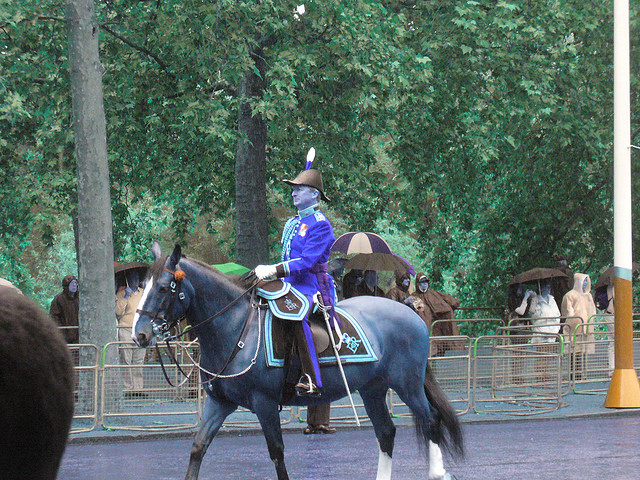

In [ ]:
import cv2
from matplotlib import pyplot as plt
!wget http://images.cocodataset.org/val2017/000000439715.jpg -q -O input.jpg
im = cv2.imread("./input.jpg")
#im = cv2.imread('./340697.jpg')
cv2_imshow(cv2.cvtColor(im, cv2.COLOR_BGR2RGB))

- Then we can create a `DemoPredictor` to run inference on this image and see the raw outputs:

tensor([17,  0,  0, 17, 17,  0,  0, 19, 20,  0, 17, 21, 17, 23, 23, 20, 20,  0,
        17], device='cuda:0')
Boxes(tensor([[1.3873e+02, 2.3407e+02, 4.7431e+02, 4.8000e+02],
        [2.7108e+02, 1.5618e+02, 3.4808e+02, 3.9430e+02],
        [2.0414e-01, 2.8325e+02, 7.4060e+01, 4.7931e+02],
        [5.0653e+02, 2.6360e+02, 5.8829e+02, 3.2713e+02],
        [3.3348e+02, 2.3190e+02, 4.1460e+02, 3.0478e+02],
        [5.5855e+02, 2.6873e+02, 5.9114e+02, 3.4870e+02],
        [4.8697e+01, 2.7488e+02, 8.1608e+01, 3.3938e+02],
        [5.0649e+02, 2.6507e+02, 5.8793e+02, 3.2114e+02],
        [5.0323e+02, 2.6438e+02, 5.8754e+02, 3.1868e+02],
        [5.9720e+02, 2.6246e+02, 6.1953e+02, 3.3661e+02],
        [4.0847e+02, 2.7846e+02, 4.6174e+02, 3.4612e+02],
        [5.0644e+02, 2.6429e+02, 5.8297e+02, 3.1640e+02],
        [1.3717e+02, 3.0347e+02, 1.8318e+02, 3.8879e+02],
        [5.5833e+02, 2.6881e+02, 5.9124e+02, 3.4833e+02],
        [4.8484e+01, 2.7426e+02, 8.1499e+01, 3.3876e+02],
        [1.716

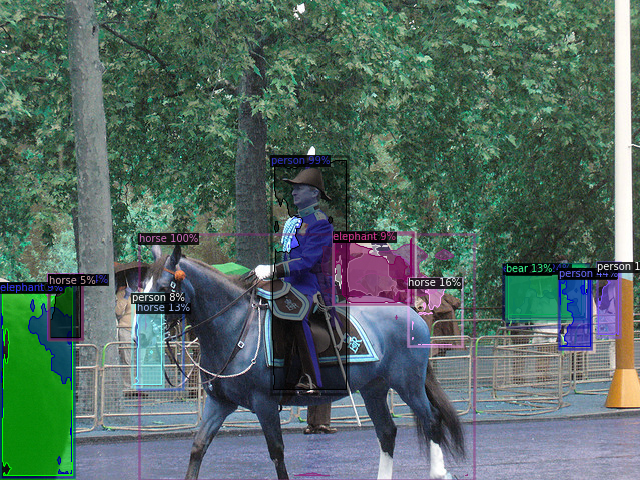

In [ ]:
from d2go.utils.demo_predictor import DemoPredictor
predictor = DemoPredictor(model)
outputs = predictor(im)
# the output object categories and corresponding bounding boxes
print(outputs["instances"].pred_classes) 
print(outputs["instances"].pred_boxes) 

from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog, DatasetCatalog

v = Visualizer(im[:, :, ::-1], MetadataCatalog.get("coco_2017_train"),scale=1.0)
out = v.draw_instance_predictions(outputs["instances"].to("cpu"))
cv2_imshow(cv2.cvtColor(out.get_image()[:, :, ::-1], cv2.COLOR_BGR2RGB))

## Train model
Now, let's fine-tune a COCO-pretrained FBNetV3A Mask R-CNN model on the balloon dataset.

In [ ]:
#access the coco datasets here and dont forget to change the classes to 80

In [ ]:
#https://github.com/facebookresearch/d2go/blob/master/configs/mask_rcnn_fbnetv3a_C4.yaml
#https://github.com/facebookresearch/d2go/blob/master/configs/mask_rcnn_fbnetv3g_fpn.yaml

In [ ]:
#from d2go.runner import Detectron2GoRunner
from d2go.runner import GeneralizedRCNNRunner

def prepare_for_launch():
    #runner = Detectron2GoRunner()
    runner = GeneralizedRCNNRunner()
    cfg = runner.get_default_cfg()
    cfg.merge_from_file(model_zoo.get_config_file("mask_rcnn_fbnetv3a_C4.yaml"))
   #cfg.merge_from_file(model_zoo.get_config_file("mask_rcnn_fbnetv3g_fpn.yaml"))
    cfg.MODEL_EMA.ENABLED = False
    cfg.DATALOADER.NUM_WORKERS = 4
    cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("mask_rcnn_fbnetv3a_C4.yaml")
   #cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("mask_rcnn_fbnetv3g_fpn.yaml")
    cfg.QUANTIZATION.BACKEND = "qnnpack"
    cfg.INPUT.MASK_FORMAT='bitmask'
    cfg.SOLVER.IMS_PER_BATCH = 8
    cfg.SOLVER.BASE_LR = 0.001 
    cfg.SOLVER.MAX_ITER = 10
    cfg.SOLVER.CHECKPOINT_PERIOD = 10 
    cfg.SOLVER.STEPS = []
    cfg.SOLVER.WARMUP_ITERS = 5
    cfg.MODEL.ROI_HEADS.BATCH_SIZE_PER_IMAGE = 512 
    cfg.MODEL.ROI_HEADS.NUM_CLASSES = 5 #num_classses + 1
    cfg.OUTPUT_DIR = '/content/'
    os.makedirs(cfg.OUTPUT_DIR, exist_ok=True)
    return cfg, runner

cfg, runner = prepare_for_launch()
model = runner.build_model(cfg)
runner.do_train(cfg, model, resume=True)

## Inference & evaluation using the trained model
Now, let's run inference with the trained model on the balloon validation dataset.

In [ ]:
metrics = runner.do_test(cfg, model)

The evaluation results are

In [ ]:
print(metrics)

## Make predictions with Detectron2 model

In [ ]:
print(cfg.OUTPUT_DIR)

In [ ]:
!ls $cfg.OUTPUT_DIR

In [ ]:
from detectron2.engine import DefaultPredictor

cfg.MODEL.WEIGHTS = os.path.join('/content/model.pth') #chnage the weights
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5   # set the testing threshold for this model
predictor = DefaultPredictor(cfg)

[06/03 09:58:51] mobile_cv.arch.utils.helper WARNING: Arguments ['width_divisor', 'dw_skip_bnrelu', 'zero_last_bn_gamma'] skipped for op Conv2d


## Export to Int8 Model
This section export int8 models using post-training quantization. For quantization-aware training, please see the [instructions](https://github.com/facebookresearch/d2go/tree/master/demo#quantization-aware-training).

In [ ]:
import copy
from detectron2.data import build_detection_test_loader
from d2go.export.api import convert_and_export_predictor
from d2go.export.d2_meta_arch import patch_d2_meta_arch

import logging

# disable all the warnings
previous_level = logging.root.manager.disable
logging.disable(logging.INFO)

patch_d2_meta_arch()

pytorch_model = runner.build_model(cfg, eval_only=True)
pytorch_model.cpu()

datasets = cfg.DATASETS.TRAIN[0]
data_loader = runner.build_detection_test_loader(cfg, datasets)

predictor_path = convert_and_export_predictor(
  copy.deepcopy(cfg),
  copy.deepcopy(pytorch_model),
  "torchscript_int8@tracing",
  '/content/'
  data_loader
)

# recover the logging level
logging.disable(previous_level)

[06/03 09:41:59] mobile_cv.arch.utils.helper WARNING: Arguments ['width_divisor', 'dw_skip_bnrelu', 'zero_last_bn_gamma'] skipped for op Conv2d


/content/drive/MyDrive/PROJECT_BIOCRUX/DATASETS/LVIS_V1.0/train/lvis_v1_train_5cat_mod_id_from_1.json


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
/usr/local/lib/python3.7/dist-packages/torch/quantization/observer.py:957: UserWarning: must run observer before calling calculate_qparams.                                    Returning default scale and zero point 
  Returning default scale and zero point "
/usr/local/lib/python3.7/dist-packages/detectron2/structures/image_list.py:92: TracerWarning: Converting a tensor to a Python boolean might cause the trace to be incorrect. We can't record the data flow of Python values, so this value will be treated as a constant in the future. This m

In [ ]:
!ls '/content/'

events.out.tfevents.1622713161.72099cbc6bc8.58.2  metrics.json
events.out.tfevents.1622713306.72099cbc6bc8.58.3  model_0000499.pth
inference					  model_final.pth
last_checkpoint					  torchscript_int8@tracing


In [ ]:
!ls '/content/torchscript_int8@tracing'

data.pth  model.jit  predictor_info.json
